In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

In [2]:
df = pd.read_csv('../data/df.csv', parse_dates=['date'], date_format='%Y-%m-%d %H:%M:%S')
df_lin_int = pd.read_csv('../data/df_linearly_interpolated.csv', parse_dates=['date'], date_format='%Y-%m-%d %H:%M:%S')

In [3]:
class DecompositionMonster:
    def __init__(self, param, df_to_interpolate):
        self.param = param
        self.series_decomposed = []
        self.missing_values_indieces = []
        self.df_stl_int = df_to_interpolate.copy()
        self.df_lin_int = df_to_interpolate.interpolate(method='linear')
    
    def decompose(self, period=24):
        self.missing_values_indieces = df_to_interpolate[df_to_interpolate[self.param].isnull()].index
        
        stl = STL(self.df_lin_int[self.param], period=period, seasonal=7)
        self.series_decomposed = stl.fit()
        self.series_decomposed.plot()
        
    def stl_interpolate(self):
        seasonal_component = self.series_decomposed.seasonal
        # seasonal_component.isna().sum()
        series_deseasonalised = df_to_interpolate[self.param] - seasonal_component
        series_deseasonalised_interpolated = series_deseasonalised.interpolate(method="linear")
        series_interpolated = series_deseasonalised_interpolated + seasonal_component
    
        # self.df_stl_int.loc[self.missing_values_indieces, self.param] = series_interpolated[self.missing_values_indieces]
        self.df_stl_int[self.param] = series_interpolated

    def comparison_plot_both(self):
        plt.figure(figsize=[12, 6])
        self.df_stl_int[self.param].plot(style='-', alpha=.5, color='red', label='STL series')
        self.df_lin_int[self.param].plot(style='-', alpha=.5, color='b', label='linear series')
        plt.scatter(self.missing_values_indieces, self.df_stl_int.loc[self.missing_values_indieces, self.param], color='red', label='STL filled values')
        plt.scatter(self.missing_values_indieces, self.df_lin_int.loc[self.missing_values_indieces, self.param], color='b', label='linear filled values')
        
        plt.title(self.param + " - STL and linear interpolation comparison")
        plt.ylabel(self.param)
        plt.xlabel("Time")
        plt.legend()
        plt.show()

    def comparison_plot_stl_only(self):
        plt.figure(figsize=[12, 6])
        self.df_stl_int[self.param].plot(style='-', alpha=.5, color='red', label='STL series')
        plt.scatter(self.missing_values_indieces, self.df_stl_int.loc[self.missing_values_indieces, self.param], color='red', label='STL filled values')
        plt.scatter(self.missing_values_indieces, self.df_lin_int.loc[self.missing_values_indieces, self.param], color='b', label='linear filled values')
        
        plt.title(self.param + " - STL and linear interpolation comparison")
        plt.ylabel(self.param)
        plt.xlabel("Time")
        plt.legend()
        plt.show()

In [4]:
# def decompose(param):
#     missing_values_indieces = df[df[param].isnull()].index
    
#     stl = STL(df_lin_int[param], period=24, seasonal=7)
#     series_decomposed = stl.fit()
#     series_decomposed.plot()

In [5]:
# def stl_interpolate(param):
#     seasonal_component = series_decomposed.seasonal
#     seasonal_component.isna().sum()
#     series_deseasonalised = df[param] - seasonal_component
#     series_deseasonalised_interpolated = series_deseasonalised.interpolate(method="linear")
#     series_interpolated = series_deseasonalised_interpolated + seasonal_component

#     # df_stl_int.loc[missing_values_indieces, param] = series_interpolated[missing_values_indieces]
#     df_stl_int[param] = series_interpolated

In [6]:
# def comparison_plot_both(param):
#     plt.figure(figsize=[12, 6])
#     df_stl_int[param].plot(style='-', alpha=.5, color='red', label='STL series')
#     df_lin_int[param].plot(style='-', alpha=.5, color='b', label='linear series')
#     plt.scatter(missing_values_indieces, df_stl_int.loc[missing_values_indieces, param], color='red', label='STL filled values')
#     plt.scatter(missing_values_indieces, df_lin_int.loc[missing_values_indieces, param], color='b', label='linear filled values')
    
#     plt.title(param + " - STL and linear interpolation comparison")
#     plt.ylabel(param)
#     plt.xlabel("Time")
#     plt.legend()
#     plt.show()

In [7]:
# def comparison_plot_stl_only(param):
#     plt.figure(figsize=[12, 6])
#     df_stl_int[param].plot(style='-', alpha=.5, color='red', label='STL series')
#     plt.scatter(missing_values_indieces, df_stl_int.loc[missing_values_indieces, param], color='red', label='STL filled values')
#     plt.scatter(missing_values_indieces, df_lin_int.loc[missing_values_indieces, param], color='b', label='linear filled values')
    
#     plt.title(param + " - STL and linear interpolation comparison")
#     plt.ylabel(param)
#     plt.xlabel("Time")
#     plt.legend()
#     plt.show()

## seasonal decomp + interpolacja na danych gdzie okreś nie był w sumie 24

In [8]:
# columns = list(df.columns)
# columns.remove('date')

# df_to_interpolate = df.copy()

# for param in columns:
#     dm = DecompositionMonster(param, df_to_interpolate=df_to_interpolate)
#     dm.decompose(period=24)
#     dm.stl_interpolate()
#     dm.comparison_plot_both()
#     dm.comparison_plot_stl_only()
#     df_to_interpolate_updated = dm.df_stl_int
#     df_to_interpolate = df_to_interpolate_updated
# df_stl_int = df_to_interpolate_updated

## seasonal decomp + interpolacja po wcześniejszym dodaniu pustych wierszy tak żeby były rokordy co 30 min

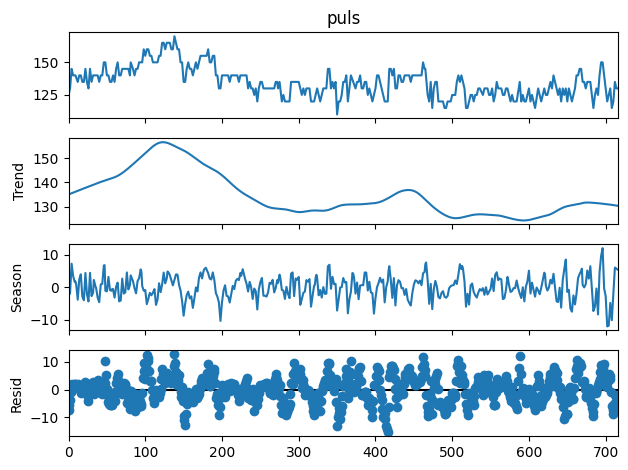

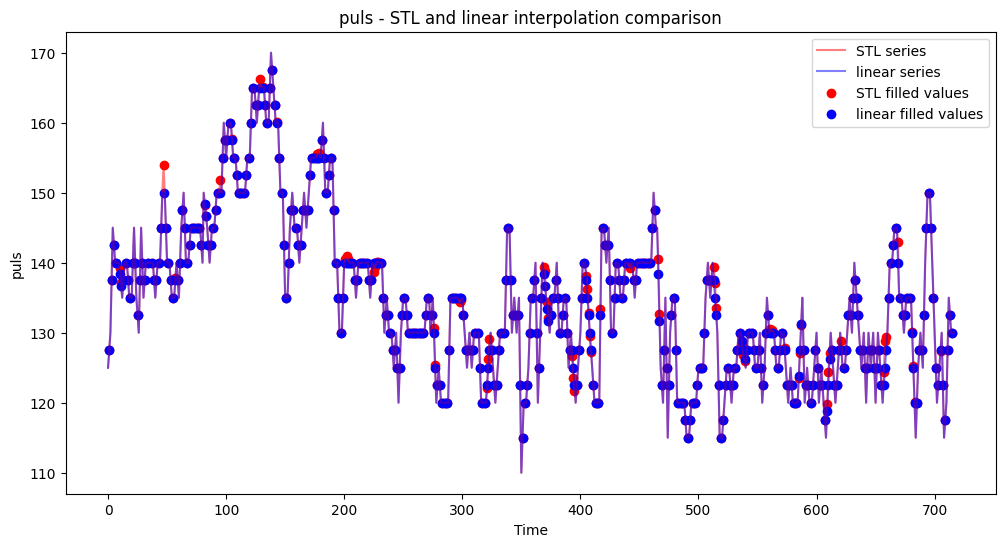

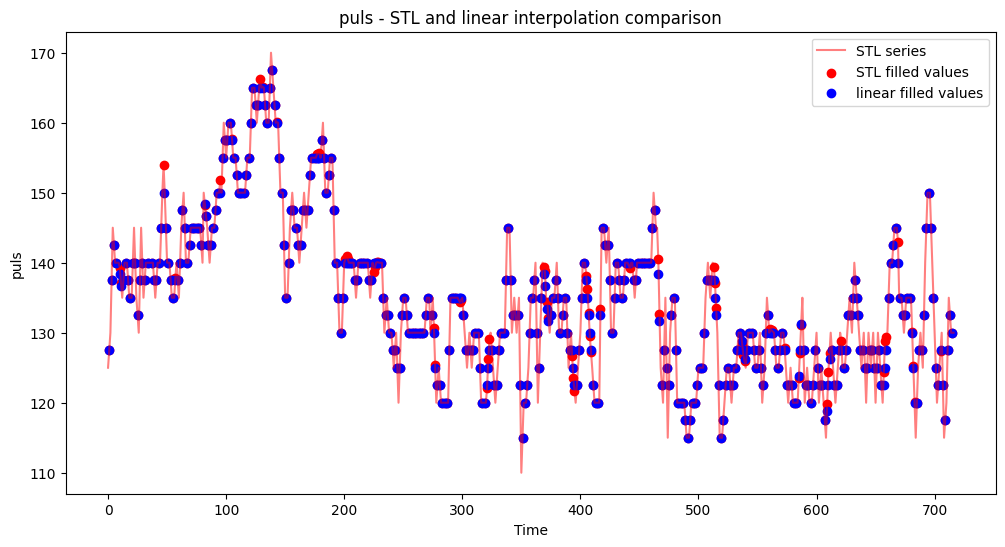

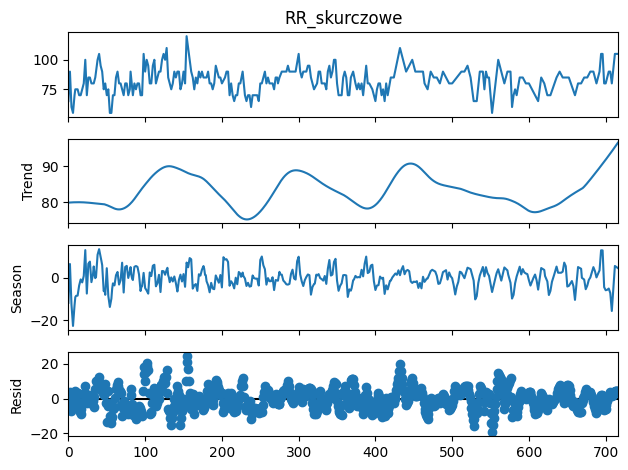

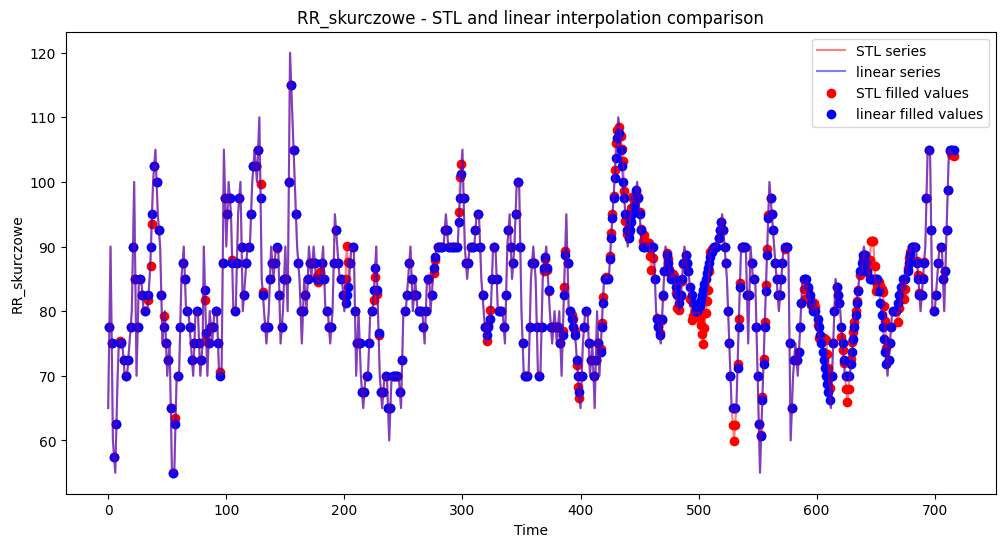

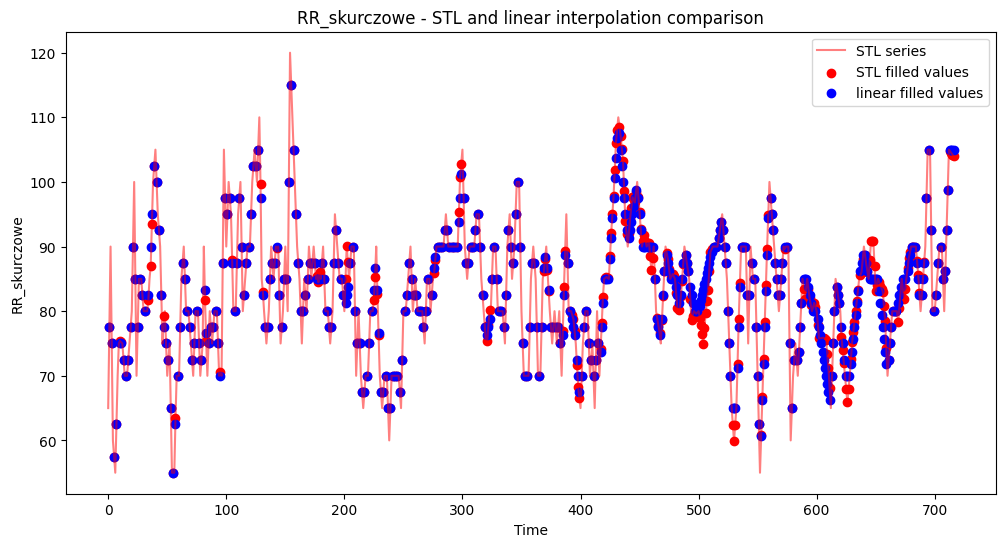

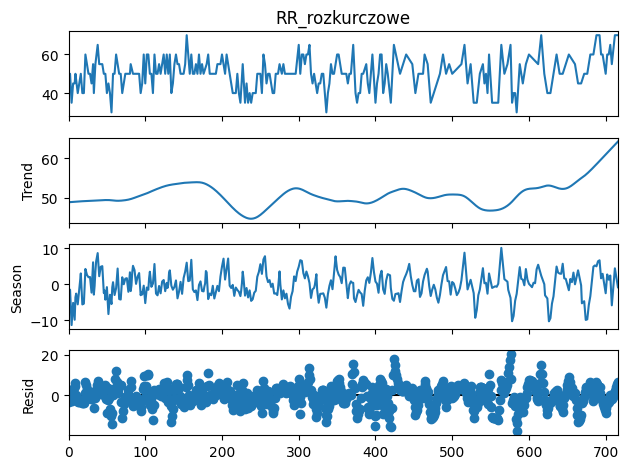

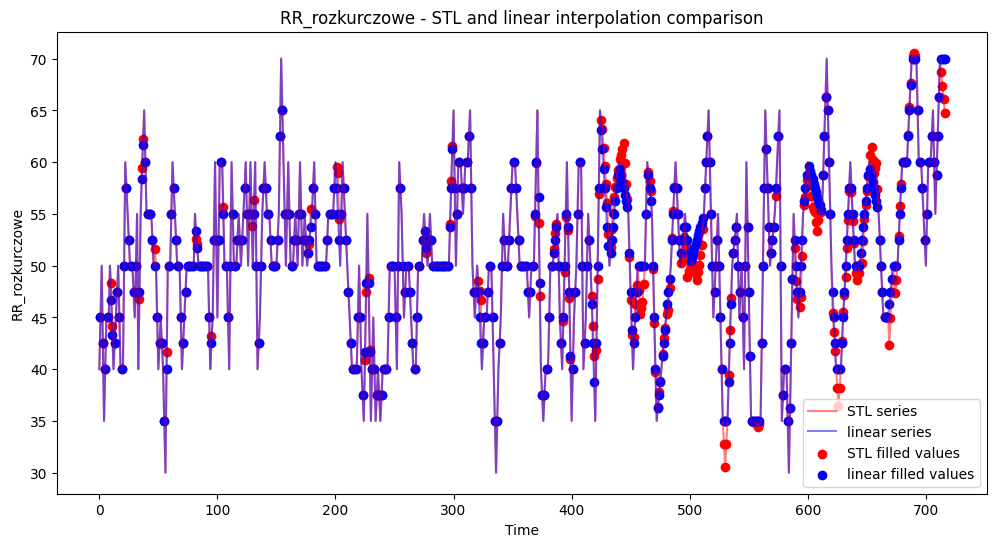

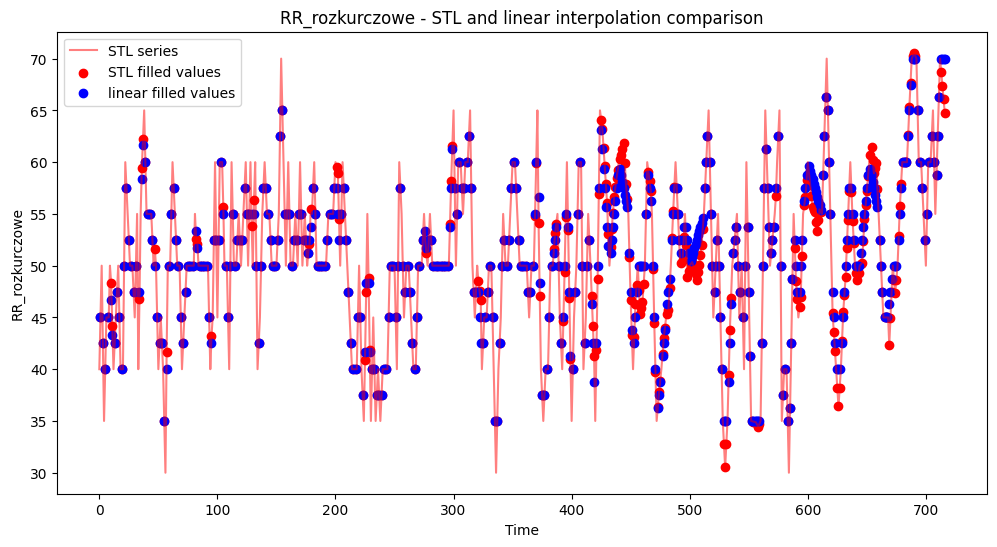

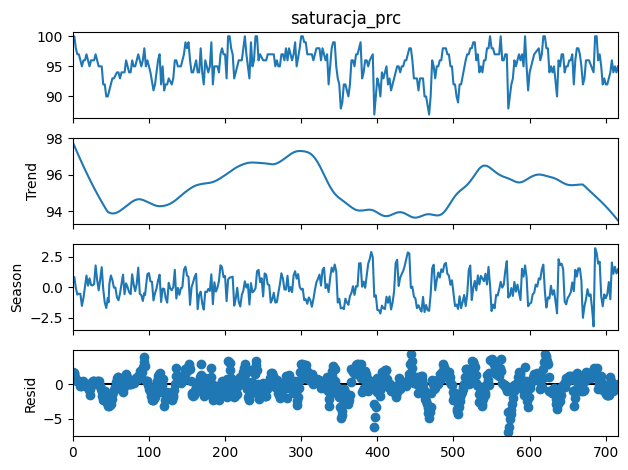

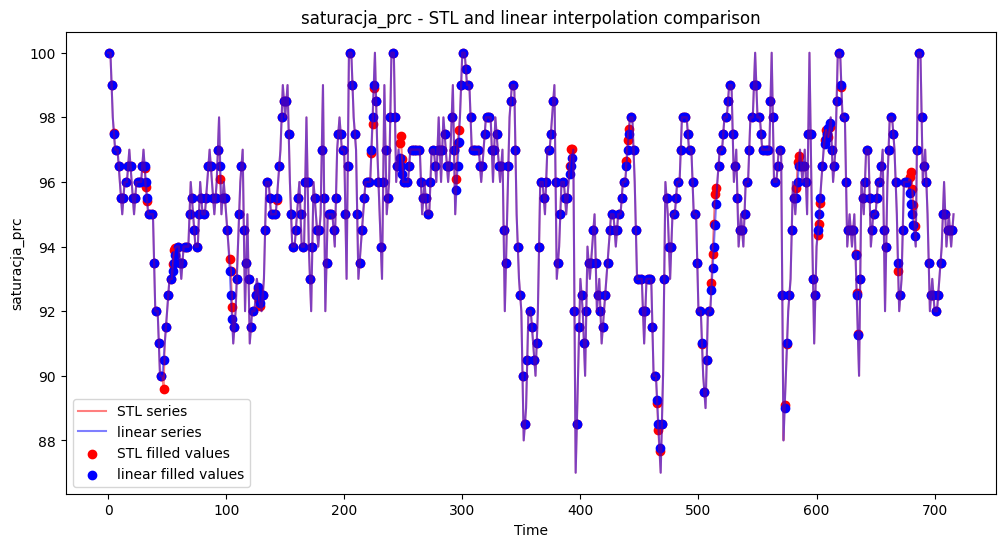

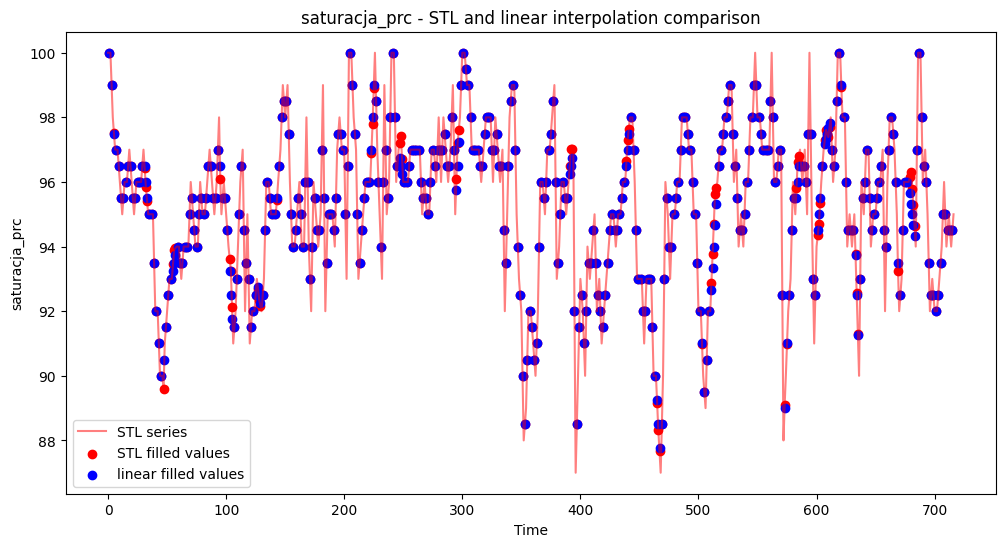

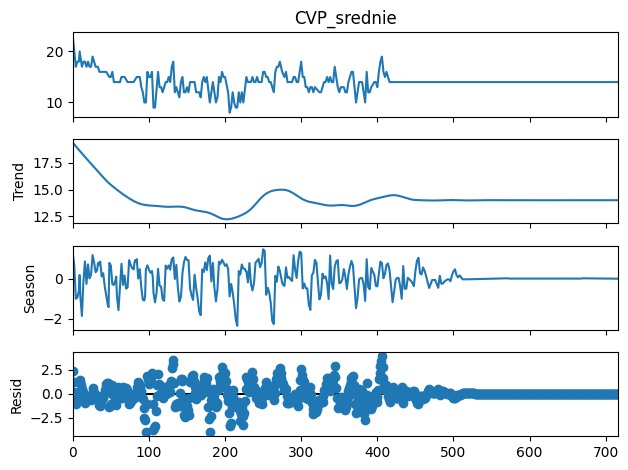

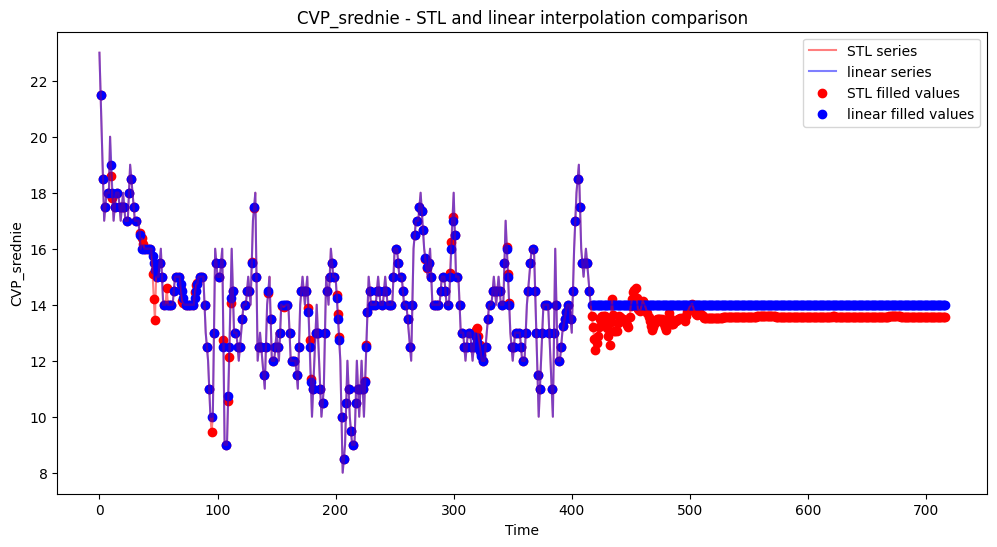

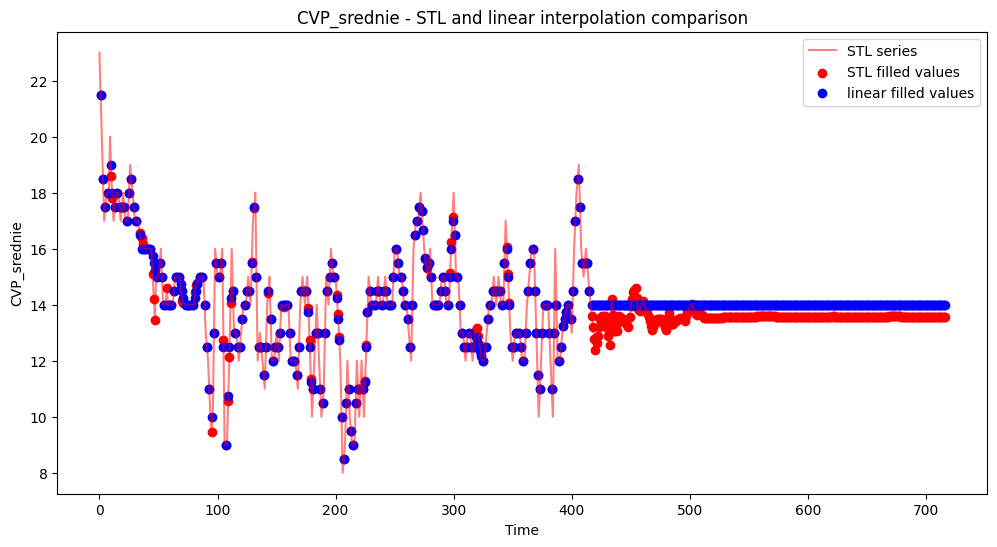

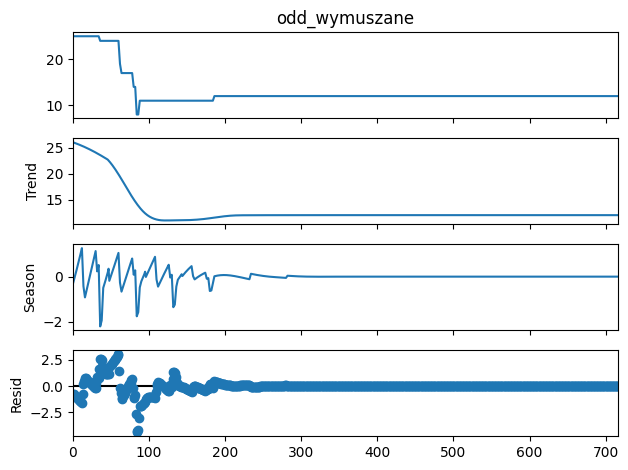

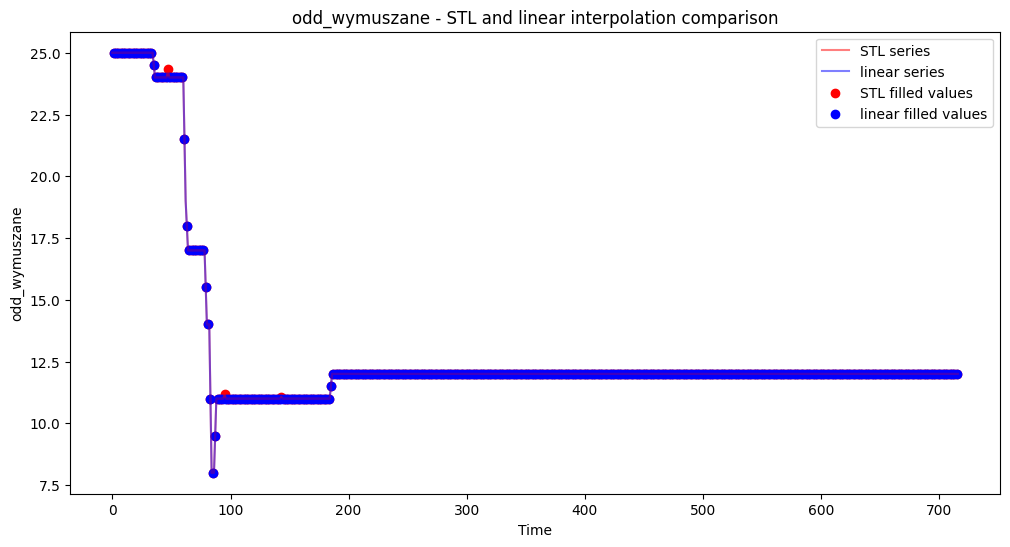

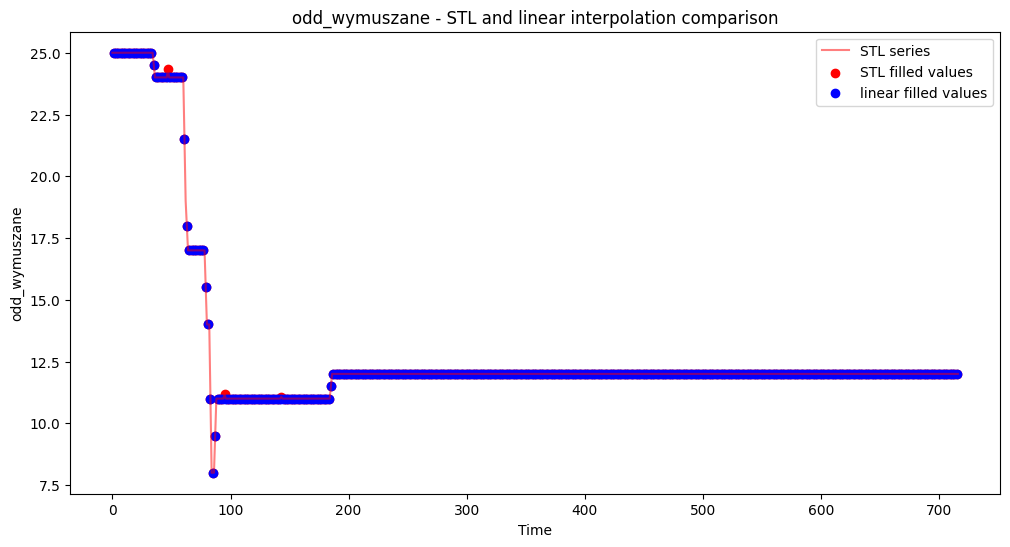

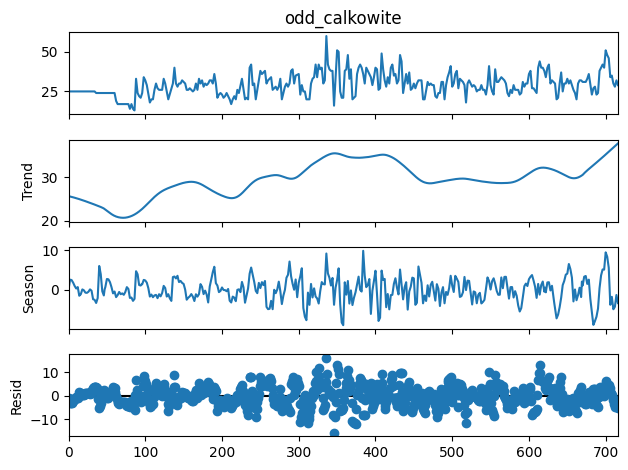

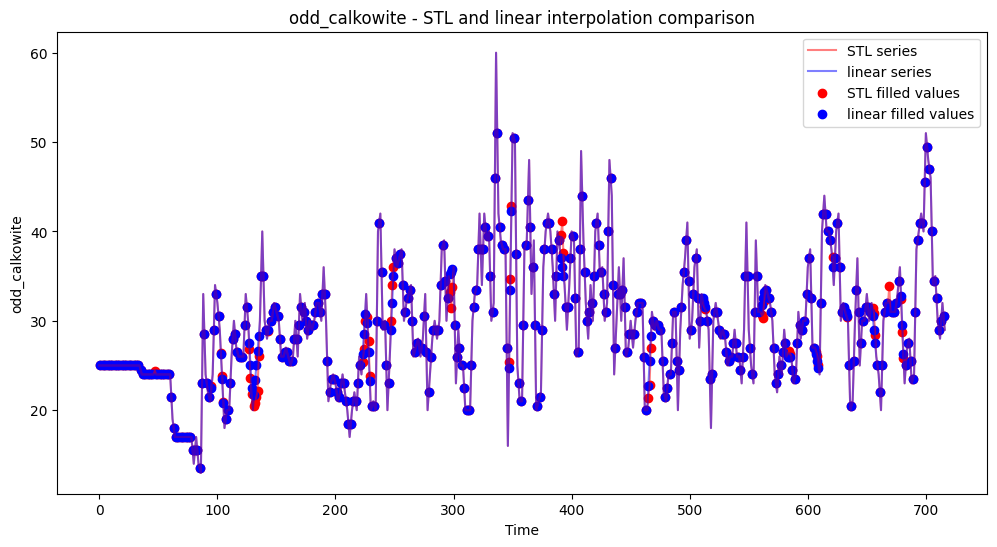

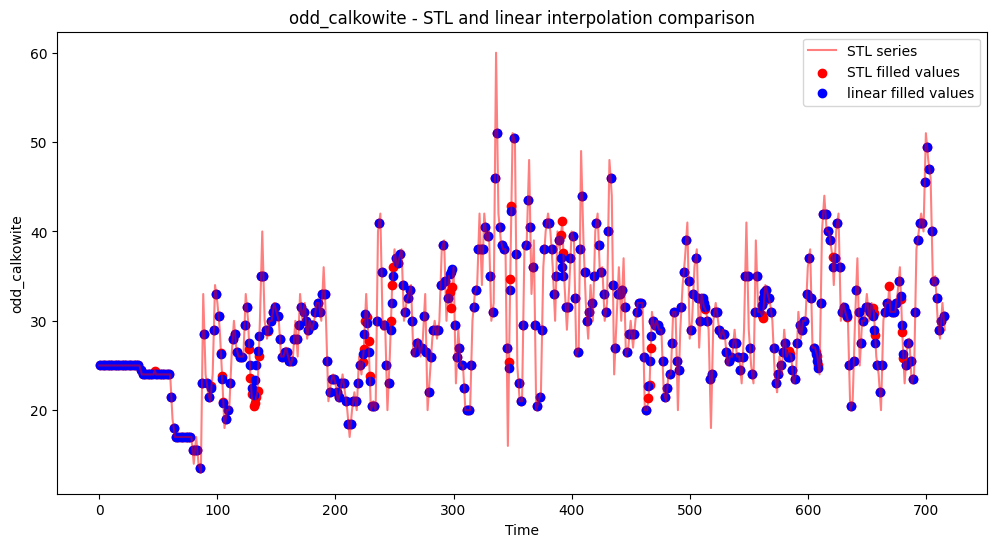

In [9]:
columns = list(df.columns)
columns.remove('date')

df_to_interpolate = df.set_index('date')
df_to_interpolate = df_to_interpolate.resample('30min').asfreq()
df_to_interpolate.reset_index(inplace=True)

for param in columns:
    dm = DecompositionMonster(param, df_to_interpolate=df_to_interpolate)
    dm.decompose(period=48)
    dm.stl_interpolate()
    dm.comparison_plot_both()
    dm.comparison_plot_stl_only()
    df_to_interpolate_updated = dm.df_stl_int
    df_to_interpolate = df_to_interpolate_updated
  

In [10]:
def round_to_5_or_0_digit(num):
    return 5 * round(num/5)

In [11]:
df_stl_int = df_to_interpolate_updated
df_stl_int.set_index('date', inplace=True)
df_stl_int = df_stl_int.resample('h').asfreq()
df_stl_int.reset_index(inplace=True)
df_stl_int = df_stl_int.round({
    'saturacja_prc': 0,
    'CVP_srednie': 0,
    'odd_wymuszane': 0,
    'odd_calkowite': 0})
for param in ['puls', 'RR_skurczowe', 'RR_rozkurczowe']:
    df_stl_int[param] = df_stl_int[param].apply(round_to_5_or_0_digit)

In [12]:
df_stl_int.head()

,date,puls,RR_skurczowe,RR_rozkurczowe,saturacja_prc,CVP_srednie,odd_wymuszane,odd_calkowite
0,2023-11-13 14:00:00,125,65,40,100.0,23.0,25.0,25.0
1,2023-11-13 15:00:00,130,90,50,100.0,20.0,25.0,25.0
2,2023-11-13 16:00:00,145,60,35,98.0,17.0,25.0,25.0
3,2023-11-13 17:00:00,140,55,45,97.0,18.0,25.0,25.0
4,2023-11-13 18:00:00,140,70,45,97.0,18.0,25.0,25.0


In [13]:
df_stl_int.to_csv('../data/df_stl_interpolated.csv', index=False)